### Paper : https://arxiv.org/abs/1908.07442
### Code : https://github.com/google-research/google-research/tree/master/tabnet
### Doc : https://dreamquark-ai.github.io/tabnet/

기존 딥러닝 모델들은 이미지, 텍스트, 음성 등 다양한 비정형 데이터 영역에서 매우 우수한 성능을 보여주었다. 그러나, 정형 데이터의 경우 XGBoost, LightGBM, CatBoost와 같은 Tree기반 앙상블 모델들이 주로 사용되고 있다.

why are the tree based models better than deep learning models for tabular data.

1. their representation power for decision manifolds with approximately hyperplane boundaries that are commonly observed for tabular data.

2. decision tree-based approaches are easy to develop and fast to train.

3. They are highly-interpretable in their basic form (e.g. by tracking decision nodes and edges) and various interpretability techniques have been shown to be effective for their ensemble form.

On the other hand, CNN or MLP may not be the best fit for tabular data decision manifolds due to being vastly overparametrized – the lack of appropriate inductive bias often causes them to fail to find robust solutions for tabular decision manifolds.

그럼에도 정형 데이터에 딥러닝 모델을 사용하는 것이 가치 있는 이유

1. 훈련 데이터가 매우 많아지면, 계산 비용은 많이 들겠지만 성능을 더 높일 수 있다.

2. 정형 데이터와 함께 다른 데이터 타입을 학습에 함께 사용 가능하다. Multi-modal learning

3. 스트림 데이터로부터의 학습이 용이하다. 기존 Tree 기반 모델들은 데이터의 분기를 통해 전역적인 통계 정보를 사용하므로 스트리밍 학습은 어렵다는 큰 단점이 존재한다.


[출처] : https://wsshin.tistory.com/5, https://slowsteadystat.tistory.com/23

In [1]:
!pip install pytorch-tabnet

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
from pytorch_tabnet.tab_model import TabNetClassifier

In [3]:

def csv_info(path):
    
    import os
    import pandas as pd

    csv_files = os.listdir(path)

    for i in csv_files:
        print(i)

        df = pd.read_csv(path+i)
        
        print(f"# of observations : {df.shape[0]}")
        print(f"# of features : {df.shape[1]}")
        
        print(f"# of numeric columns : {df.select_dtypes(include='number').shape[1]}")
        print(f"# of object columns : {df.select_dtypes(include=object).shape[1]}")
        print('='*50)
        

In [4]:
csv_info('../data/classification/')

abalone.csv
# of observations : 4174
# of features : 9
# of numeric columns : 8
# of object columns : 1
abalone19.csv
# of observations : 4174
# of features : 9
# of numeric columns : 8
# of object columns : 1
abalone9-18.csv
# of observations : 731
# of features : 9
# of numeric columns : 8
# of object columns : 1
adult.csv
# of observations : 48842
# of features : 15
# of numeric columns : 7
# of object columns : 8
appendicitis.csv
# of observations : 106
# of features : 8
# of numeric columns : 8
# of object columns : 0
australian.csv
# of observations : 690
# of features : 15
# of numeric columns : 15
# of object columns : 0
automobile.csv
# of observations : 205
# of features : 26
# of numeric columns : 16
# of object columns : 10
balance.csv
# of observations : 625
# of features : 5
# of numeric columns : 5
# of object columns : 0
banana.csv
# of observations : 5300
# of features : 3
# of numeric columns : 3
# of object columns : 0
bands.csv
# of observations : 539
# of features 

# of numeric columns : 17
# of object columns : 0
phoneme.csv
# of observations : 5404
# of features : 6
# of numeric columns : 6
# of object columns : 0
pima.csv
# of observations : 768
# of features : 9
# of numeric columns : 9
# of object columns : 0
poker.csv
# of observations : 1025009
# of features : 11
# of numeric columns : 11
# of object columns : 0
post-operative.csv
# of observations : 90
# of features : 9
# of numeric columns : 2
# of object columns : 7
ring.csv
# of observations : 7400
# of features : 21
# of numeric columns : 21
# of object columns : 0
saheart.csv
# of observations : 462
# of features : 10
# of numeric columns : 9
# of object columns : 1
satimage.csv
# of observations : 6435
# of features : 37
# of numeric columns : 37
# of object columns : 0
segment.csv
# of observations : 2310
# of features : 20
# of numeric columns : 20
# of object columns : 0
segment0.csv
# of observations : 2308
# of features : 20
# of numeric columns : 20
# of object columns : 0
shu

In [22]:
import pandas as pd

# Dataset : https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
df_raw = pd.read_csv('../data/classification/adult.csv')

df_raw.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [23]:

def check_missing(df, fillna=None):
    # !pip install missingno
    import missingno as msno
    
    print(f"\n# of observations : {df.shape[0]}")
    print(f"# of features : {df.shape[1]}\n")
    
    print("Ratio of missing values in a column (%)")
    print(round( df.isnull().sum() / df.shape[0] * 100, 2))
    
    %matplotlib inline
    msno.matrix(df)
    
    for idx, i in enumerate(df.isnull().sum()):
        if i > 0:
            if df.iloc[:,idx].dtype == 'object':
                print(f"The {idx}-th column\n")
                print(df.iloc[:,idx].value_counts(dropna=False))
            else:
                print(f"The {idx}-th column is not object type.")
            print("="*50)
    


# of observations : 48842
# of features : 15

Ratio of missing values in a column (%)
x1     0.00
x2     5.73
x3     0.00
x4     0.00
x5     0.00
x6     0.00
x7     5.75
x8     0.00
x9     0.00
x10    0.00
x11    0.00
x12    0.00
x13    0.00
x14    1.75
y      0.00
dtype: float64
The 1-th column

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NaN                  2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: x2, dtype: int64
The 6-th column

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
NaN                  2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: x7, dtype: int64
The 13-th colu

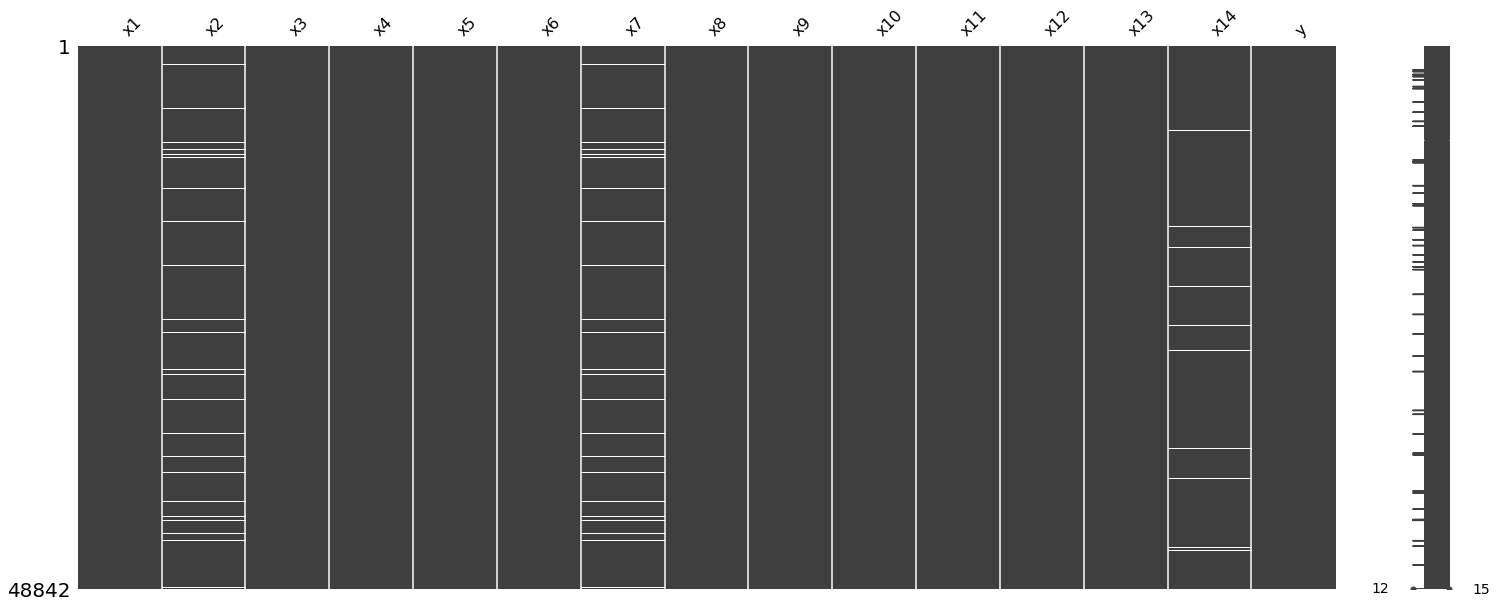

In [24]:
check_missing(df_raw)

In [25]:
df_modified = df_raw.fillna(value='NaN')

In [26]:
def label_encoding(df, unused_feat):
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    
    categorical_columns = []
    categorical_dims =  {}
    
    for col in df.columns:
        if df[col].dtype == 'object':
            categorical_columns.append(col)
            categorical_dims[col] = len(df[col].unique())
            
            df[col] = encoder.fit_transform(df[col])
            
    features = [ col for col in df.columns if col not in unused_feat] 
    cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
    cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]

    return categorical_columns, categorical_dims, cat_idxs, cat_dims

In [27]:
categorical_columns, categorical_dims, cat_idxs, cat_dims = label_encoding(df_modified, ['Set', 'y'])

In [28]:

def dataset_split(df, train=.8, valid=.1, test=.1):
    import numpy as np
        
    if "Set" not in df.columns:
        df['Set'] = np.random.choice(['train', 'valid', 'test'], 
                                     p =[.8, .1, .1], 
                                     size=(df.shape[0],))
        
    print(df['Set'].value_counts())
    
            

In [29]:
dataset_split(df_modified)

train    38958
valid     4990
test      4894
Name: Set, dtype: int64


In [30]:
def train_test_split(df, target):

    train_indices = df_modified[df_modified.Set=="train"].index
    valid_indices = df_modified[df_modified.Set=="valid"].index
    test_indices = df_modified[df_modified.Set=="test"].index
    
    features = [ col for col in df.columns if col not in ['Set']+[target]]

    X_train = df_modified[features].values[train_indices]
    y_train = df_modified[target].values[train_indices]

    X_valid = df_modified[features].values[valid_indices]
    y_valid = df_modified[target].values[valid_indices]

    X_test = df_modified[features].values[test_indices]
    y_test = df_modified[target].values[test_indices]
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [31]:
df_modified

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y,Set
0,25,4,226802,1,7,4,6,3,2,1,0,0,40,39,0,train
1,38,4,89814,11,9,2,4,0,4,1,0,0,50,39,0,train
2,28,1,336951,7,12,2,11,0,4,1,0,0,40,39,1,train
3,44,4,160323,15,10,2,6,0,2,1,7688,0,40,39,1,train
4,18,2,103497,15,10,4,7,3,4,0,0,0,30,39,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0,train
48838,40,4,154374,11,9,2,6,0,4,1,0,0,40,39,1,valid
48839,58,4,151910,11,9,6,0,4,4,0,0,0,40,39,0,train
48840,22,4,201490,11,9,4,0,3,4,1,0,0,20,39,0,train


In [32]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_test_split(df_modified, 'y', )

In [34]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

clf = TabNetClassifier(cat_idxs=cat_idxs,
                       cat_dims=cat_dims,
                       cat_emb_dim=10,
                       optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=1e-2),
                       scheduler_params={"step_size":50,
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax' # "sparsemax", entmax
                      )

C:\Users\12182\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [64]:
max_epochs = 30
save_history = []

clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['auc'],
    max_epochs=max_epochs , patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
    warm_start=True,
)
save_history.append(clf.history["valid_auc"])

epoch 0  | loss: 0.38548 | train_auc: 0.90921 | valid_auc: 0.90209 |  0:00:01s
epoch 1  | loss: 0.38232 | train_auc: 0.91047 | valid_auc: 0.90361 |  0:00:03s
epoch 2  | loss: 0.37685 | train_auc: 0.91271 | valid_auc: 0.90405 |  0:00:05s
epoch 3  | loss: 0.37336 | train_auc: 0.91386 | valid_auc: 0.90442 |  0:00:07s
epoch 4  | loss: 0.37364 | train_auc: 0.91465 | valid_auc: 0.90669 |  0:00:09s
epoch 5  | loss: 0.37873 | train_auc: 0.91492 | valid_auc: 0.90583 |  0:00:11s
epoch 6  | loss: 0.37199 | train_auc: 0.91618 | valid_auc: 0.90722 |  0:00:12s
epoch 7  | loss: 0.37115 | train_auc: 0.91614 | valid_auc: 0.90552 |  0:00:14s
epoch 8  | loss: 0.36649 | train_auc: 0.91678 | valid_auc: 0.90607 |  0:00:16s
epoch 9  | loss: 0.36692 | train_auc: 0.91705 | valid_auc: 0.90724 |  0:00:18s
epoch 10 | loss: 0.36022 | train_auc: 0.91787 | valid_auc: 0.90758 |  0:00:20s
epoch 11 | loss: 0.36909 | train_auc: 0.91779 | valid_auc: 0.90559 |  0:00:22s
epoch 12 | loss: 0.36748 | train_auc: 0.9183  | vali

C:\Users\12182\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


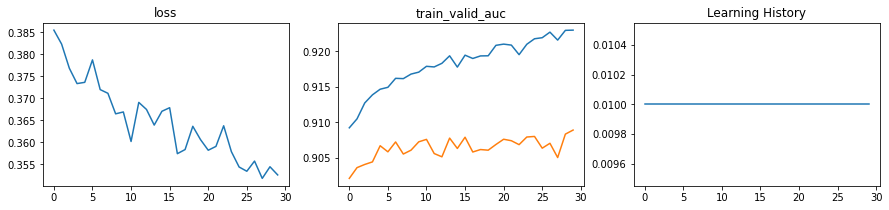

In [73]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,3))

axs[0].plot(clf.history['loss'])
axs[0].set_title(f"loss")

axs[1].plot(clf.history['train_auc'])
axs[1].plot(clf.history['valid_auc'])
axs[1].set_title("train_valid_auc")

axs[2].plot(clf.history['lr'])
axs[2].set_title(f"learning rate")


In [67]:
from sklearn.metrics import roc_auc_score

preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)

print(f"FINAL TEST SCORE : {test_auc}")

FINAL TEST SCORE : 0.9100346568863411


<AxesSubplot:>

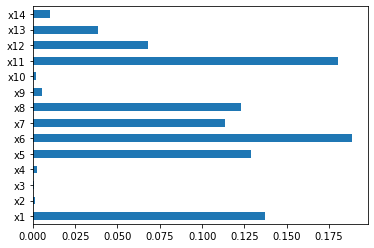

In [71]:
# Feature Importance
features = [ col for col in df_modified.columns if col not in ['Set', 'y']] 

feat_importances = pd.Series(clf.feature_importances_, index=features)
feat_importances.plot(kind='barh')

In [76]:
import matplotlib.pyplot as plt

explain_matrix, masks = clf.explain(X_test)


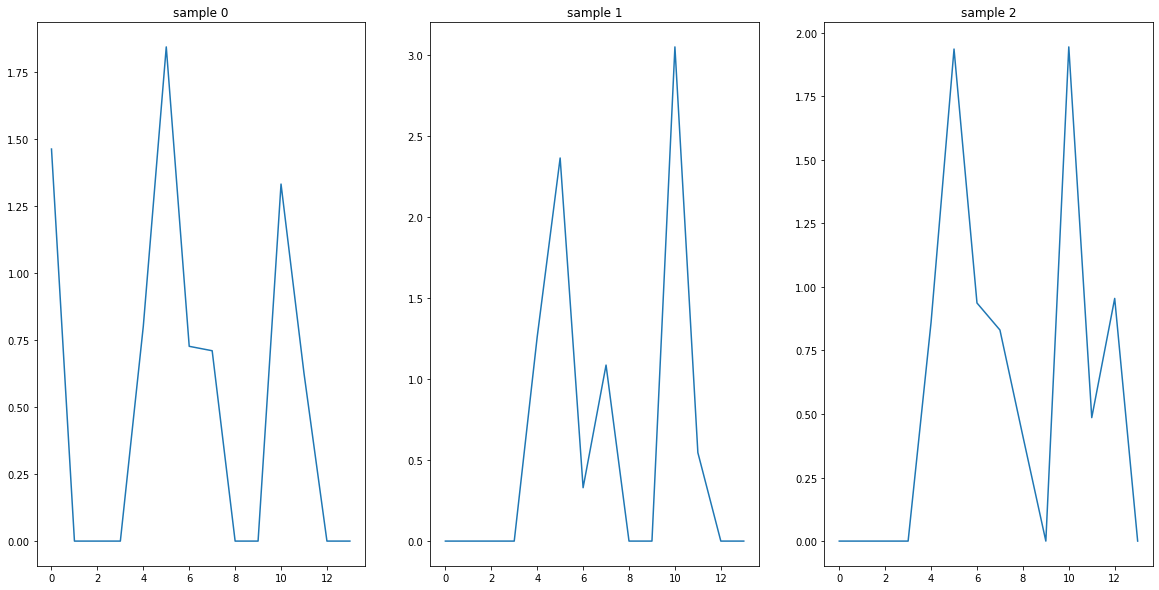

In [81]:
fig, axs = plt.subplots(1, 3, figsize=(20,10))
for i in range(3):
    axs[i].plot(explain_matrix[i])
    axs[i].set_title(f"sample {i}")

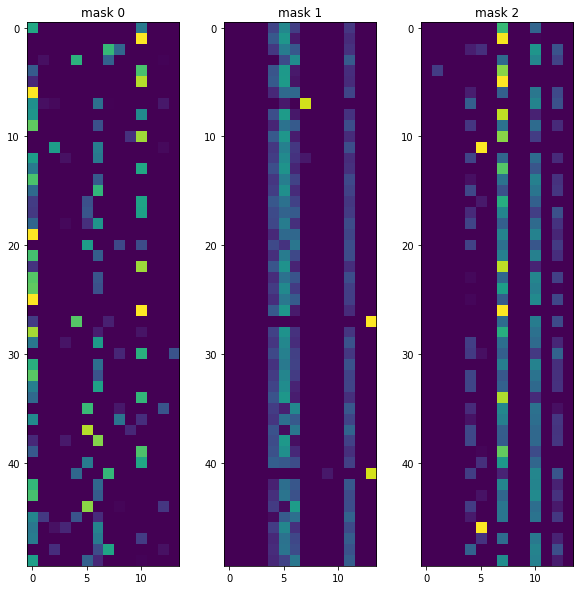

In [83]:
fig, axs = plt.subplots(1, 3, figsize=(10,10))
for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")